In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
data=pd.read_csv("netflix_titles.csv") #get the data

In [69]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [70]:
data.columns # to get columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [71]:
data.dtypes #to get datatypes of columns

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [72]:
data.describe() #to get the statistics of data

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [73]:
data.describe

<bound method NDFrame.describe of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail M

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
show_id         8807 non-null object
type            8807 non-null object
title           8807 non-null object
director        6173 non-null object
cast            7982 non-null object
country         7976 non-null object
date_added      8797 non-null object
release_year    8807 non-null int64
rating          8803 non-null object
duration        8804 non-null object
listed_in       8807 non-null object
description     8807 non-null object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [75]:
#Cleaning the data
#check for duplicate and null values in the dataset
data.shape


(8807, 12)

In [76]:
data[data.duplicated()]  # to check the duplicate values
# data.drop_duplicates(inplace = True)  --- to remove duplicate values

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


This dataset doesn't contain any duplicate values

In [77]:
data.isnull()   #to identify the null values

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [78]:
data.isnull().sum() #Identify total null values for each column

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

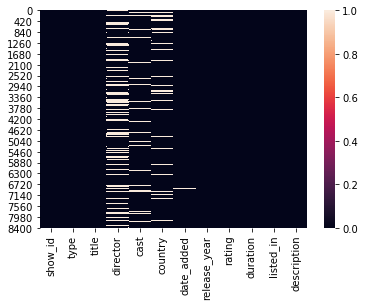

In [79]:
sns.heatmap(data.isnull()) #visulaizing the null values with heatmap

In [80]:
data.drop(['director','cast'],axis=1,inplace=True) #drop director, cast
#data.dropna() - to drop all the columns that has null values

In [81]:
data.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [82]:
#data.drop(['date_added'],axis=1,inplace=True) 
data.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [83]:
#replacing Nan values with relavant values
data['rating'].replace(np.nan,'TV-MA', inplace=True)
data['country'].replace(np.nan,'United States', inplace=True)

In [84]:
data.isnull().sum()

show_id          0
type             0
title            0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

In [85]:
data['duration'].replace(np.nan,'2 seasons', inplace=True)

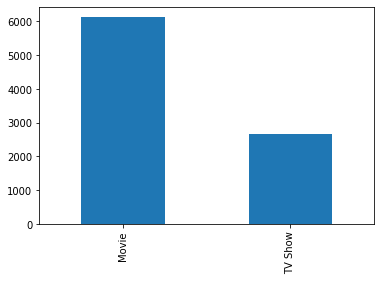

In [86]:
# Data analysis : to count the total number of tv shows & movies in netflix data
data.groupby('type').type.count() 
data['type'].value_counts().plot(kind='bar') # plot the data


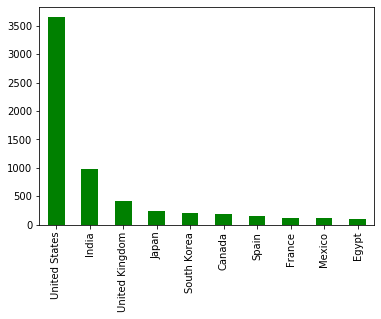

In [87]:
#Top 10 countries released shows on netflix
data['country'].value_counts().head(10).plot(kind='bar', color='g') 

In [88]:
# Checking in which year netflix has released more no of tv shows / movies etc
data['Date_New'] = pd.to_datetime(data['date_added'])
data.dtypes

show_id                 object
type                    object
title                   object
country                 object
date_added              object
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
Date_New        datetime64[ns]
dtype: object

In [89]:
data['Date_New'].dt.year.value_counts()

2019.0    2016
2020.0    1879
2018.0    1649
2021.0    1498
2017.0    1188
2016.0     429
2015.0      82
2014.0      24
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: Date_New, dtype: int64

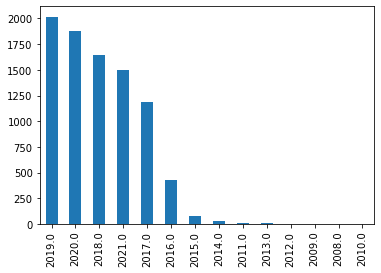

In [90]:
data['Date_New'].dt.year.value_counts().plot(kind='bar')

Netflix has released more shows/movies in the year 2019

In [91]:
#Analyzing what type of shows did netflix released more in 2019
movies = data[data['type']=='Movie']
movies.count()

show_id         6131
type            6131
title           6131
country         6131
date_added      6131
release_year    6131
rating          6131
duration        6131
listed_in       6131
description     6131
Date_New        6131
dtype: int64

In [94]:
movies_2019 = movies[movies['release_year']==2019]
movies_2019.count()

show_id         633
type            633
title           633
country         633
date_added      633
release_year    633
rating          633
duration        633
listed_in       633
description     633
Date_New        633
dtype: int64

In [95]:
data[ (data['type'] == 'Movie') & (data['release_year']==2019) ]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,Date_New
90,s91,Movie,Paradise Hills,"Spain, United States","September 9, 2021",2019,TV-MA,95 min,"Sci-Fi & Fantasy, Thrillers",Uma wakes up in a lush tropical facility desig...,2021-09-09
334,s335,Movie,Five Feet Apart,United States,"August 1, 2021",2019,PG-13,116 min,"Dramas, Romantic Movies",A teen with cystic fibrosis shakes up her dail...,2021-08-01
348,s349,Movie,Poms,"United Kingdom, United States","August 1, 2021",2019,PG-13,91 min,Comedies,"After moving to a retirement community, loner ...",2021-08-01
378,s379,Movie,Fantastic Fungi,United States,"July 28, 2021",2019,TV-14,81 min,Documentaries,"Delve into the magical world of fungi, from mu...",2021-07-28
389,s390,Movie,The Operative,"France, Israel, Germany, United States, United...","July 27, 2021",2019,TV-MA,117 min,"Dramas, International Movies, Thrillers","Working as a Mossad spy assigned to Tehran, Ra...",2021-07-27
...,...,...,...,...,...,...,...,...,...,...,...
8516,s8517,Movie,The Spy Who Fell to Earth,United Kingdom,"April 5, 2019",2019,TV-MA,94 min,"Documentaries, International Movies","Based on Dr. Ahron Bregman's book, this docume...",2019-04-05
8631,s8632,Movie,Trixie Mattel: Moving Parts,United States,"March 27, 2020",2019,TV-MA,91 min,"Documentaries, Music & Musicals",Drag queen Trixie Mattel deals with the bitter...,2020-03-27
8718,s8719,Movie,Westside vs. the World,United States,"August 9, 2019",2019,TV-MA,96 min,"Documentaries, Sports Movies",A look into the journey of influential strengt...,2019-08-09
8752,s8753,Movie,Wish Man,United States,"December 3, 2019",2019,TV-14,108 min,"Children & Family Movies, Dramas","After surviving a life-threatening accident, a...",2019-12-03


In [96]:
Tvshows = data[data['type']=='TV Show']
Tvshows.count()
Tvshows_2019 = Tvshows[Tvshows['release_year']==2019]
Tvshows_2019.count()

show_id         397
type            397
title           397
country         397
date_added      397
release_year    397
rating          397
duration        397
listed_in       397
description     397
Date_New        397
dtype: int64

In [97]:
data[ (data['type'] == 'TV Show') & (data['release_year']==2019) ]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,Date_New
87,s88,TV Show,Titipo Titipo,United States,"September 10, 2021",2019,TV-Y,2 Seasons,"Kids' TV, Korean TV Shows",Titipo the train is out to prove that he's got...,2021-09-10
100,s101,TV Show,Tobot Galaxy Detectives,United States,"September 7, 2021",2019,TV-Y7,2 Seasons,Kids' TV,An intergalactic device transforms toy cars in...,2021-09-07
121,s122,TV Show,Hotel Del Luna,United States,"September 2, 2021",2019,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",When he's invited to manage a hotel for dead s...,2021-09-02
165,s166,TV Show,Oldsters,United States,"September 1, 2021",2019,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",Three friends in their 70s step out of retirem...,2021-09-01
232,s233,TV Show,Wheel of Fortune,United States,"August 25, 2021",2019,TV-G,3 Seasons,Reality TV,Pat Sajak and Vanna White host one of TV's mos...,2021-08-25
...,...,...,...,...,...,...,...,...,...,...,...
7235,s7236,TV Show,Krishna Balram,United States,"July 8, 2019",2019,TV-Y7,1 Season,Kids' TV,"From playing pranks to destroying demons, Lord...",2019-07-08
7408,s7409,TV Show,Married at First Sight,United States,"April 13, 2020",2019,TV-14,1 Season,"Reality TV, Romantic TV Shows","Set up by experts, four couples meet at the al...",2020-04-13
8121,s8122,TV Show,Super Bheem,India,"June 28, 2019",2019,TV-Y,1 Season,Kids' TV,In this 3D-animated spinoff from the Chhota Bh...,2019-06-28
8173,s8174,TV Show,Thackeray,India,"May 25, 2019",2019,TV-MA,1 Season,TV Shows,From controversial cartoonist to powerful Mumb...,2019-05-25


Netflix has released 633 movies & 397 tv shows in the year 2019

In [105]:
data[ (data['country']=='United States') & (data['release_year']==2019)]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,Date_New
87,s88,TV Show,Titipo Titipo,United States,"September 10, 2021",2019,TV-Y,2 Seasons,"Kids' TV, Korean TV Shows",Titipo the train is out to prove that he's got...,2021-09-10
100,s101,TV Show,Tobot Galaxy Detectives,United States,"September 7, 2021",2019,TV-Y7,2 Seasons,Kids' TV,An intergalactic device transforms toy cars in...,2021-09-07
121,s122,TV Show,Hotel Del Luna,United States,"September 2, 2021",2019,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",When he's invited to manage a hotel for dead s...,2021-09-02
165,s166,TV Show,Oldsters,United States,"September 1, 2021",2019,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",Three friends in their 70s step out of retirem...,2021-09-01
232,s233,TV Show,Wheel of Fortune,United States,"August 25, 2021",2019,TV-G,3 Seasons,Reality TV,Pat Sajak and Vanna White host one of TV's mos...,2021-08-25
...,...,...,...,...,...,...,...,...,...,...,...
8468,s8469,Movie,The Pursuit,United States,"August 7, 2019",2019,TV-14,76 min,Documentaries,In a time of turbulence for the free market sy...,2019-08-07
8631,s8632,Movie,Trixie Mattel: Moving Parts,United States,"March 27, 2020",2019,TV-MA,91 min,"Documentaries, Music & Musicals",Drag queen Trixie Mattel deals with the bitter...,2020-03-27
8718,s8719,Movie,Westside vs. the World,United States,"August 9, 2019",2019,TV-MA,96 min,"Documentaries, Sports Movies",A look into the journey of influential strengt...,2019-08-09
8752,s8753,Movie,Wish Man,United States,"December 3, 2019",2019,TV-14,108 min,"Children & Family Movies, Dramas","After surviving a life-threatening accident, a...",2019-12-03


In [109]:
#data.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'Date_New'],
      dtype='object')

In [110]:
data['rating'].value_counts().head(10)

TV-MA    3211
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: rating, dtype: int64

In [111]:
data[ (data['country']=='United States') & (data['rating']=='TV-MA')]['title']

2                                 Ganglands
3                     Jailbirds New Orleans
5                             Midnight Mass
10      Vendetta: Truth, Lies and The Mafia
11                         Bangkok Breaking
                       ...                 
8716                     Welcome to Willits
8718                 Westside vs. the World
8734              Who the F**k Is That Guy?
8756                              Woodstock
8760                       Would You Rather
Name: title, Length: 1205, dtype: object

In [64]:
#Identify top 5 categories of movies & tv shows released in netflix data
movies.listed_in.value_counts()

Dramas, International Movies                         362
Documentaries                                        359
Stand-Up Comedy                                      334
Comedies, Dramas, International Movies               274
Dramas, Independent Movies, International Movies     252
                                                    ... 
Action & Adventure, Anime Features, Horror Movies      1
Action & Adventure, Documentaries, Sports Movies       1
Cult Movies, Independent Movies, Thrillers             1
Children & Family Movies, Comedies, Cult Movies        1
Classic Movies, Comedies, Sports Movies                1
Name: listed_in, Length: 278, dtype: int64

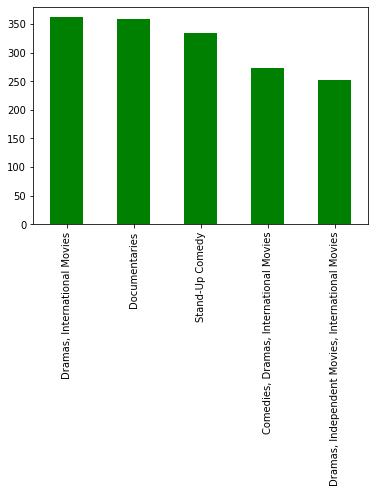

In [113]:
movies.listed_in.value_counts().head(5).plot(kind='bar', color='g') 

In [68]:
Tvshows.listed_in.value_counts()

Kids' TV                                                        220
International TV Shows, TV Dramas                               121
Crime TV Shows, International TV Shows, TV Dramas               110
Kids' TV, TV Comedies                                            99
Reality TV                                                       95
                                                               ... 
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows      1
Reality TV, Spanish-Language TV Shows                             1
TV Action & Adventure                                             1
Crime TV Shows, International TV Shows, TV Mysteries              1
Crime TV Shows, International TV Shows, TV Thrillers              1
Name: listed_in, Length: 236, dtype: int64

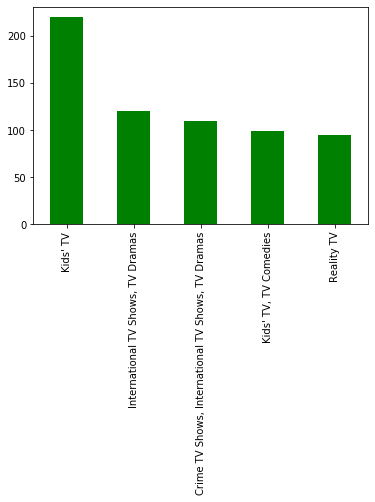

In [114]:
Tvshows.listed_in.value_counts().head(5).plot(kind='bar', color='g') 

In [70]:
movies.country.value_counts() 

United States                                   2498
India                                            893
United Kingdom                                   206
Canada                                           122
Spain                                             97
                                                ... 
Namibia                                            1
United States, France, Italy, United Kingdom       1
Italy, India                                       1
Austria, Iraq, United States                       1
United States,                                     1
Name: country, Length: 651, dtype: int64

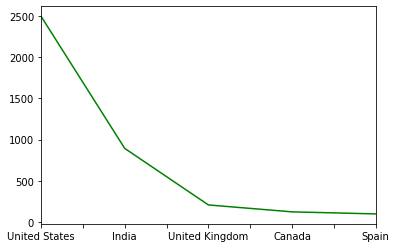

In [116]:
#Coutry wise analysis of releases 
movies.country.value_counts().head(5).plot(kind='line', color='g') 

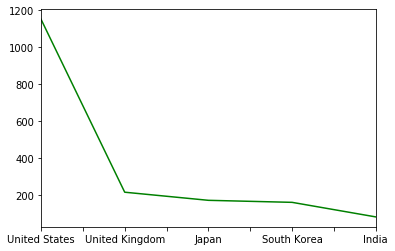

In [117]:
Tvshows.country.value_counts().head(5).plot(kind='line', color='g') 